#Guía de trabajo Módulo 2 – Aprendizaje Supervisado

 **INTEGRANTES**:

*   Cesar Iván Ávila Díaz
*   Marcelo Lemus
* María Gabriel Pérez
* Verónica Andrea Morales González


**Caso de estudio**

La agencia de marketing Sterling Cooper Advertising tiene en su planta de empleados alrededor de
4.000 personas directamente contratadas. Sin embargo, el departamento de recursos humanos ha
reportado cifras preocupantes a la dirección de la agencia, indicando que cada año, alrededor del
15% de sus empleados abandonan la empresa y necesitan ser reemplazados, en la mayoría de casos,
con muy poco tiempo para el proceso de selección y contratación. La dirección cree que este nivel
de bajas (empleados que se marchan, ya sea por decisión propia o porque son despedidos) es
perjudicial para la empresa, por las siguientes razones:

● Los proyectos de los antiguos empleados se retrasan, lo que dificulta el cumplimiento de los plazos, con la consiguiente pérdida de reputación entre sus clientes y socios.

● El departamento de recursos humanos requiere mucha inversión por los niveles de rotación,así que la mayoría de su personal está dedicado a tareas de reclutamiento de nuevo talento, haciendo más lento el proceso de desarrollo de otras áreas dentro del departamento dedicadas por ejemplo a la formación o bienestar de sus empleados.

● En la mayoría de los casos, hay que formar a los nuevos empleados para el puesto y/o darles
tiempo para que se adapten a la cultura de la agencia.


Por ello, la dirección ha contratado a su equipo de consultores para saber en qué factores deben centrarse para frenar el abandono de empleados. En otras palabras, quieren predecir a tiempo si sus empleados van a abandonar su empleo para tomar acciones preventivas que les permita retener a la mayoría de los empleados en riesgo. También quieren saber cuál de estas variables es la más importante y debe abordarse de inmediato.


# **a. Diseño de solución propuesta**

El objetivo es desarrollar un modelo predictivo que identifique a tiempo a los empleados en riesgo de abandonar la empresa. Esto permitirá tomar acciones preventivas para retener a la mayoría de los empleados en riesgo. La solución propuesta debería incluir un sistema de alerta temprana y recomendaciones personalizadas para retener a los empleados.

In [ ]:
#Preparamos complementos, librerías y bases disponibles
import warnings

warnings.filterwarnings("ignore")

!pip install pandas numpy sweetviz seaborn matplotlib scikit-learn

#Instalación de complemento
!pip install sweetviz

#importar librerias
import pandas as pd
import numpy as np
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


%matplotlib inline

# Lectura de los datos
#df_auto = pd.read_csv('data/auto-mpg.csv')
dfemployee_survey_data= pd.read_csv("https://raw.githubusercontent.com/ivandiaz25/Proyecto_Analitica_1/master/Datasets/employee_survey_data.csv", na_values='?')
dfgeneral_data = pd.read_csv("https://raw.githubusercontent.com/ivandiaz25/Proyecto_Analitica_1/master/Datasets/general_data.csv", na_values='?')
dfmanager_survey_data = pd.read_csv("https://raw.githubusercontent.com/ivandiaz25/Proyecto_Analitica_1/master/Datasets/manager_survey_data.csv", na_values='?')
dftime_work = pd.read_csv("https://raw.githubusercontent.com/ivandiaz25/Proyecto_Analitica_1/master/Datasets/time_work.csv", na_values='?', sep = ';')

# **b. Limpieza y transformación de los datos**

Antes de realizar cualquier análisis, los datos deben ser limpiados y transformados. Esto implica tratar valores faltantes, eliminar duplicados, convertir datos categóricos en numéricos si es necesario, y realizar otras tareas de limpieza de datos

In [ ]:
#Un primer vistazo para verificar que se hayan cargado las tablas correctamente
dfgeneral_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
#Visualizamos las primeras líneas de los archivos
#Para empleados
dfemployee_survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [ ]:
#Para gerente
dfmanager_survey_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [ ]:
#Para tiempo de trabajo
dftime_work.head()

,EmployeeID,mean_time
0,1,"6,8702"
1,2,"7,316"
2,3,"6,8161"
3,4,"6,7892"
4,5,"7,8776"


In [ ]:
#Procedemos a unir las tablas para que sea mas fácil trabajarlas
dftotal=dfgeneral_data.merge(dfemployee_survey_data, on="EmployeeID", how="left")

dftotal2=dftotal.merge(dfmanager_survey_data, on="EmployeeID", how="left")

dftotal3=dftotal2.merge(dftime_work, on="EmployeeID", how="left")

# Tenemos finalmente un solo dataframe combinado con todas las tablas a partir de la columna ID
dfdata=dftotal3.copy()
dfdata.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,mean_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3.0,4.0,2.0,3,3,"6,8702"
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,3.0,2.0,4.0,2,4,"7,316"
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,2.0,2.0,1.0,3,3,"6,8161"
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,4.0,4.0,3.0,2,3,"6,7892"
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,4.0,1.0,3.0,3,3,"7,8776"


In [ ]:
# Ahora realizaremos una revisión inicial de datos para obsevar cómo se encuentra nuestro dataframe
dfdata.shape

(4410, 30)

In [ ]:
# Verificamos lista de variables o etiquetas de las columnas presentes en el DataFrame.
dfdata.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'mean_time'],
      dtype='object')

In [ ]:
#Verificamos la información sobre las columnas y su tipo de datos
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
# Verificamos si hay columnas con datos nulos en el conjunto de datos.
dfdata.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
mean_time                   0
dtype: int64

In [ ]:
# como en esta variables hay nulos, analizaremos el número de valores de cada uno.
dfdata['NumCompaniesWorked'].value_counts()

1.0    1558
0.0     586
3.0     474
2.0     438
4.0     415
7.0     222
6.0     208
5.0     187
9.0     156
8.0     147
Name: NumCompaniesWorked, dtype: int64

In [ ]:
dfdata['TotalWorkingYears'].value_counts()

10.0    605
6.0     375
8.0     307
9.0     287
5.0     264
7.0     243
1.0     242
4.0     189
12.0    144
3.0     126
15.0    120
16.0    111
13.0    108
11.0    106
21.0    102
17.0     99
14.0     93
2.0      93
20.0     89
18.0     81
23.0     66
19.0     66
22.0     62
24.0     54
25.0     42
26.0     42
28.0     42
0.0      33
29.0     30
31.0     27
32.0     27
27.0     21
30.0     21
33.0     21
36.0     18
34.0     15
37.0     12
35.0      9
40.0      6
38.0      3
Name: TotalWorkingYears, dtype: int64

In [ ]:
# para nuestro analisis es mas facil observarlos de mayor a menor, asi que vamos a organizarlos con un pequeño data frame
dfdatay = dfdata.loc[:, ['EmployeeID','TotalWorkingYears']]
dfdatay

,EmployeeID,TotalWorkingYears
0,1,1.0
1,2,6.0
2,3,5.0
3,4,13.0
4,5,9.0
...,...,...
4405,4406,10.0
4406,4407,10.0
4407,4408,5.0
4408,4409,10.0


In [ ]:
ddatay2 = dfdatay.sort_values(by='TotalWorkingYears', ascending=False)
ddatay2

,EmployeeID,TotalWorkingYears
3277,3278,40.0
1807,1808,40.0
4278,4279,40.0
2808,2809,40.0
337,338,40.0
...,...,...
1517,1518,NaN
2367,2368,NaN
3120,3121,NaN
3818,3819,NaN


In [ ]:
#Una vez observado lo que contiene cada variable procederemos primero a tratar los nulos.
# primero analizaremos el porcentaje de nulos que presenta nuestra base de datos
round(dfdata.isnull().sum().sum()/dfdata.size, 4)*100

0.08

In [ ]:
#Como observamos el porcentaje de nulos es mucho menor al 0.1% del total de datos, por lo que no son tan significativos, entonces aprovecharemos
#que se encuentran en varibales con respuestas numericas para aproximarlas al promedio, asi:
median_NumCompaniesWorked=round(dfdata['NumCompaniesWorked'].median())
print(median_NumCompaniesWorked)
dfdata['NumCompaniesWorked']=dfdata['NumCompaniesWorked'].fillna(median_NumCompaniesWorked)
print(dfdata['NumCompaniesWorked'].isnull().sum())
print(dfdata['NumCompaniesWorked'].unique())

2
0
[1. 0. 3. 4. 2. 7. 9. 5. 6. 8.]


In [ ]:
mode_EnvironmentSatisfaction = dfdata['EnvironmentSatisfaction'].mode()
print(mode_EnvironmentSatisfaction)
dfdata['EnvironmentSatisfaction'].fillna(mode_EnvironmentSatisfaction[0], inplace=True)
print(dfdata['EnvironmentSatisfaction'].isnull().sum())
print(dfdata['EnvironmentSatisfaction'].unique())

0    3.0
Name: EnvironmentSatisfaction, dtype: float64
0
[3. 2. 4. 1.]


In [ ]:
median_TotalWorkingYears=round(dfdata['TotalWorkingYears'].median())
print(median_TotalWorkingYears)
dfdata['TotalWorkingYears']=dfdata['TotalWorkingYears'].fillna(median_NumCompaniesWorked)
print(dfdata['TotalWorkingYears'].isnull().sum())
print(dfdata['TotalWorkingYears'].unique())

10
0
[ 1.  6.  5. 13.  9. 28. 10. 21. 16. 37.  7.  3. 15.  8.  2. 12. 17. 19.
 22.  4. 23.  0. 11. 24. 25. 20. 14. 26. 18. 30. 36. 31. 33. 32. 34. 40.
 29. 35. 27. 38.]


In [ ]:
mode_JobSatisfaction = dfdata['JobSatisfaction'].mode()
print(mode_JobSatisfaction)
dfdata['JobSatisfaction'].fillna(mode_JobSatisfaction[0], inplace=True)
print(dfdata['JobSatisfaction'].isnull().sum())
print(dfdata['JobSatisfaction'].unique())

0    4.0
Name: JobSatisfaction, dtype: float64
0
[4. 2. 1. 3.]


In [ ]:
mode_WorkLifeBalance = dfdata['WorkLifeBalance'].mode()
print(mode_WorkLifeBalance)
dfdata['WorkLifeBalance'].fillna(mode_WorkLifeBalance[0], inplace=True)
print(dfdata['WorkLifeBalance'].isnull().sum())
print(dfdata['WorkLifeBalance'].unique())

0    3.0
Name: WorkLifeBalance, dtype: float64
0
[2. 4. 1. 3.]


In [ ]:
dfdata['mean_time'] = dfdata['mean_time'].str.replace(',', '.')

In [ ]:
dfdata['mean_time'] = pd.to_numeric(dfdata['mean_time'], errors='coerce')
print(dfdata['mean_time'])

0       6.8702
1       7.3160
2       6.8161
3       6.7892
4       7.8776
         ...  
4405    8.3169
4406    5.8972
4407    7.1495
4408    9.1876
4409    6.5118
Name: mean_time, Length: 4410, dtype: float64


In [ ]:
mean_mean_time=(dfdata['mean_time'].mean())
print(mean_mean_time)
dfdata['mean_time']=dfdata['mean_time'].fillna(mean_mean_time)
print(dfdata['mean_time'].isnull().sum())
print(dfdata['mean_time'].unique())

7.314362494331067
0
[6.8702 7.316  6.8161 ... 5.8972 9.1876 6.5118]


In [ ]:
# Como podemos observar ahora ya fueron tratados todos los nulos, por lo tanto podemos proceder a realizar el análisis exploratorio para entender mejor
# el comportamiento de nuestras variables
dfdata.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
mean_time                  0
dtype: int64

In [ ]:
df_datafinal = dfdata.loc[:,['Age','DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'mean_time','BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole', 'MaritalStatus', 'Education','JobLevel', 'StockOptionLevel',  'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'Attrition']]

In [ ]:
df_datafinal.shape

(4410, 26)

In [ ]:
df_datafinal.describe()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,mean_time,Education,JobLevel,StockOptionLevel,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,65029.312925,2.691837,15.209524,11.260998,2.799320,7.008163,2.187755,4.123129,7.314362,2.912925,2.063946,0.793878,2.725170,2.734014,2.763492,2.729932,3.153741
std,9.133301,8.105026,47068.888559,2.493912,3.659108,7.785550,1.288978,6.125135,3.221699,3.567327,1.330769,1.023933,1.106689,0.851883,1.089852,1.102071,0.703541,0.711400,0.360742
min,18.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.416900,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,29110.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000,6.279400,2.000000,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,49190.000000,2.000000,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000,7.011150,3.000000,2.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,83800.000000,4.000000,18.000000,15.000000,3.000000,9.000000,3.000000,7.000000,7.900750,4.000000,3.000000,1.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,199990.000000,9.000000,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000,10.937300,5.000000,5.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [ ]:
#ahora estudiaremos mejor el comportamiento de las variables para observar la aproximación de nuestro analisiS exploratorio
df_datafinal[['StockOptionLevel', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']]= df_datafinal[['StockOptionLevel', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']].astype(str)

In [ ]:
df_datafinal[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'mean_time']] = df_datafinal[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'mean_time']].astype(float)

In [ ]:
df_datafinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   float64
 1   DistanceFromHome         4410 non-null   float64
 2   MonthlyIncome            4410 non-null   float64
 3   NumCompaniesWorked       4410 non-null   float64
 4   PercentSalaryHike        4410 non-null   float64
 5   TotalWorkingYears        4410 non-null   float64
 6   TrainingTimesLastYear    4410 non-null   float64
 7   YearsAtCompany           4410 non-null   float64
 8   YearsSinceLastPromotion  4410 non-null   float64
 9   YearsWithCurrManager     4410 non-null   float64
 10  mean_time                4410 non-null   float64
 11  BusinessTravel           4410 non-null   object 
 12  Department               4410 non-null   object 
 13  EducationField           4410 non-null   object 
 14  Gender                  

In [ ]:
df2_dummys = pd.get_dummies(df_datafinal.iloc[:,:-1])
df2_dummys.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,...,EnvironmentSatisfaction_3.0,EnvironmentSatisfaction_4.0,JobSatisfaction_1.0,JobSatisfaction_2.0,JobSatisfaction_3.0,JobSatisfaction_4.0,WorkLifeBalance_1.0,WorkLifeBalance_2.0,WorkLifeBalance_3.0,WorkLifeBalance_4.0
0,51.0,6.0,131160.0,1.0,11.0,1.0,6.0,1.0,0.0,0.0,...,1,0,0,0,0,1,0,1,0,0
1,31.0,10.0,41890.0,0.0,23.0,6.0,3.0,5.0,1.0,4.0,...,1,0,0,1,0,0,0,0,0,1
2,32.0,17.0,193280.0,1.0,15.0,5.0,2.0,5.0,0.0,3.0,...,0,0,0,1,0,0,1,0,0,0
3,38.0,2.0,83210.0,3.0,11.0,13.0,5.0,8.0,7.0,5.0,...,0,1,0,0,0,1,0,0,1,0
4,32.0,10.0,23420.0,4.0,12.0,9.0,2.0,6.0,0.0,4.0,...,0,1,1,0,0,0,0,0,1,0


In [ ]:
df2_dummys.columns

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'mean_time', 'Education', 'JobLevel', 'JobInvolvement',
       'PerformanceRating', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sal

In [ ]:
# imprimir los valores únicos de cada columna.
for columna in dfdata.columns[:]:
  print('\n {}'.format(columna))
  print(dfdata[columna].unique())


 Age
[51 31 32 38 46 28 29 25 45 36 55 47 37 21 35 26 50 53 42 44 49 18 41 39
 58 33 43 52 27 30 54 40 23 48 57 34 24 22 56 60 19 20 59]

 Attrition
['No' 'Yes']

 BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

 Department
['Sales' 'Research & Development' 'Human Resources']

 DistanceFromHome
[ 6 10 17  2  8 11 18  1  7 28 14  3  4 16  9  5 20 29 15 13 24 19 22 25
 21 26 27 12 23]

 Education
[2 1 4 5 3]

 EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

 EmployeeCount
[1]

 EmployeeID
[   1    2    3 ... 4408 4409 4410]

 Gender
['Female' 'Male']

 JobLevel
[1 4 3 2 5]

 JobRole
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']

 MaritalStatus
['Married' 'Single' 'Divorced']

 MonthlyIncome
[131160  41890 193280 ...  37020  23980  54680]

 NumCompaniesWorked
[1. 0. 3. 4. 2

# **c. Análisis exploratorio de los datos**

Explorar los datos para comprender las características de los empleados que abandonan la empresa. Esto podría incluir análisis de estadísticas descriptivas, visualización de datos y la identificación de patrones preliminares.

In [ ]:
#ahora haremos una exploración rapida de las variables
rgd = sv.analyze(df_datafinal)
rgd.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)

La mayoría de los empleados de la empresa se encuentra con salarios entre los 25.000 y los 50.000 dólares, y en menor proporción algunos empleados ganan más de 150.000 dólares.

En cuanto al nivel de satisfacción laboral; la mayoría está ubicada entre los puntajes 3 y 4. En el nivel de implicación en el trabajo, la gran mayoría de empleados se ubica en puntaje 3

En el entorno de trabajo, el nivel de satisfacción predomina entre los puntajes 3 y 4, sin embargo, hay una cantidad también representativa en los menores puntajes. En cuanto a la valoración del rendimiento del último año, se ubica en su mayoría en puntaje 3 y una pequeña proporción en puntaje 4. La mayoría de empleados son de género masculino.

Se observa que la gran mayoría de empleados pertenecen al departamento de investigación y desarrollo, en segundo lugar con una notable diferencia, está el departamento de ventas y finalmente el departamento de recursos humanos es quien tiene la menor cantidad de empleados.

En cuanto al nivel de educación, en una escala de 1 a 5, la mayoría de empleados está con una educación de nivel medio representado en 3.0, otra cantidad representativa tiene nivel 4 de estudio y una pequeña proporción tiene nivel 5. Por otro lado, una cantidad considerable de empleados, tienen bajos niveles educativos.

Entre los campos de estudio de los empleados, la mayoría está formada en cincias para la vida, y en segundo lugar está el campo de la medicina. En otras bajas proporciones, está mercadeo, titulos técnicos y recursos humanos y otra clasificación para diferentes campos.


**Ahora comparemos algunas variables con la variable retiros que es el objetivo**

In [ ]:
# Personas de que edad se retiran mas
pd.crosstab(index=df_datafinal['Age'],
            columns=df_datafinal["Attrition"]).plot(kind='bar', figsize=(25,5),colormap='summer')
#Los colaboradores que mas se retiran estan entre los 29 y los 31 años

In [ ]:
# Que genero es el que se esta retirando mas y el de los colaboradores
pd.crosstab(index=df_datafinal['Gender'],
            columns=df_datafinal['Attrition']).plot(kind='bar', figsize=(10,5),colormap='summer')
#Los hombres son el genero que mas se ha retirado

In [ ]:
# Rol en la empresa de los colaboradoresy retirados
pd.crosstab(index=df_datafinal['JobRole'],
            columns=df_datafinal['Attrition']).plot(kind='barh', figsize=(20,10), colormap='summer')
#El rol que mas se retira es de sales executive y Research scientist

In [ ]:
# Profesion de los colaboradores y retirados
pd.crosstab(index=df_datafinal['EducationField'],
            columns=df_datafinal['Attrition']).plot(kind='barh', figsize=(20,10), colormap='summer')
#La profesion que mas se retira en "la empresa" es life science

In [ ]:
#Satisfacción de los colaboradores y retirados con el ambiente de trabajo
pd.crosstab(index=df_datafinal['EnvironmentSatisfaction'],
            columns=df_datafinal['Attrition']).plot(kind='bar', figsize=(25,10), colormap='summer')
#Los colaboradores que mas se han retirado son los que califican como baja su satisfaccion con el ambiente laboral

In [ ]:
#Balance de vida de colaboradores y retirados
pd.crosstab(index=df_datafinal['WorkLifeBalance'],
            columns=df_datafinal['Attrition']).plot(kind='bar', figsize=(25,10), colormap='summer')
#Los empleados que dicen tener un balance entre su vida laboral y el trabajo entre bueno y excelente son los que mas desercicion han ten

In [ ]:
#Los colaboradores y retirados y sus viajes por negocios
pd.crosstab(index=df_datafinal['BusinessTravel'],
            columns=df_datafinal['Attrition']).plot(kind='bar', figsize=(27,10), colormap='summer')
#Los colaboradores tanto los activos como los que renunciaron rara vez viajan, y la población de los que rara vez viajan son los que tie

In [ ]:
# Años que han pasado desde la ultima promoción en general
pd.crosstab(index=df_datafinal['YearsSinceLastPromotion'],
            columns=df_datafinal['Attrition']).plot(kind='bar', figsize=(20,7), colormap='summer')
#Los que mas retiran son los que nuncca han tenido una promocion seguido de los que promovieron hace un año.

In [ ]:
# Años bajo el mando del gerente actual en general
pd.crosstab(index=df_datafinal['YearsWithCurrManager'],
            columns=df_datafinal['Attrition']).plot(kind='bar', figsize=(20,7), colormap='summer')
# La mayoria de los que se retiran no han pasado ni un año con el gerente actual, seguido de los que llevanban 2 años bajo su mando y luego los q

In [ ]:
#Grafico de correlación

plt.figure (figsize=(20, 10), dpi=80);
sns.heatmap(df_datafinal.corr(), annot = True,cmap='summer');
#Hay correlación fuerte positiva en las variables percentSalaryHike, PerformanceRating, YearsAtCompany,

In [ ]:
#Retiros segun los Años Trabajados
pd.crosstab(index=df_datafinal['TotalWorkingYears'],
            columns=df_datafinal['Attrition']).plot(kind='bar', figsize=(20,7), colormap='summer')
#Los empelados que mas renuncian son los que llevan un año trabajado

In [ ]:
#Promedio de salario mensual de empleados que renuncian
df_datafinal.groupby(["Attrition"])[["MonthlyIncome"]].mean().round(2).reset_index().rename(columns={'MonthlyIncome':'Salario Promedio'})
#el salario promedio de las personas que renuncian es menor que las que no por casi 4000 de diferencia

In [ ]:
#Promedio de horas trabajadas de empleados que renuncian
df_datafinal.groupby(["Attrition"])[["mean_time"]].mean().round(2).reset_index()
#Los empleados que renuncian trabajan en promedio casi una hora mas diaria que los que no lo hacen.

In [ ]:
df_datafinal['Attrition'].value_counts().plot(kind='bar')

# **d. Preparación de los datos**

Preparar los datos para el modelado, dividiéndolos en conjuntos de entrenamiento y prueba. Además, realizar la codificación de variables categóricas y normalización de datos si es necesario.

**Separaración de variables y características**


In [ ]:
X = df2_dummys
y = df_datafinal.iloc[:, -1].values # target

In [ ]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(y[0:5])


**Train/Test split**

In [ ]:
# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

# **e. Selección de variables**

Identificar las variables más relevantes para la predicción de abandono de empleados.

###Variance Threshold
Elimina todas las características cuya varianza no alcanza algún umbral.
De forma predeterminada, elimina todas las características de varianza cero, es decir, las características que tienen el mismo valor en todas las muestras.

In [ ]:
X = df2_dummys

In [ ]:
#Variance Threshold
from sklearn.feature_selection import VarianceThreshold

#Función de filtro de caracteristicas
def variance_threshold(x,th):
    var_thres=VarianceThreshold(threshold=th)
    var_thres.fit(x)
    new_cols = var_thres.get_support()
    return new_cols

In [ ]:
# Obtener columnas seleccionadas
X_new = variance_threshold(X, 0.5)
# Nuevo dataframe
df_new = df2_dummys.iloc[:,X_new]
df_new.head()

In [ ]:
X = df_new
y = df_datafinal.iloc[:, -1].values # target

# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

In [ ]:
# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train_std, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std,y_train)*100) + "%")
print("Score: ", regr.score(X_train_std, y_pred))

In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test_std)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std,y_test)*100) + "%")

In [ ]:
#validar modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='CMRmap_r')
plt.show()
print(cm)

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Precisión: {TP/(TP+FP)}')
print(f'Recuperación: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

###RFE
El objetivo de la eliminación recursiva de características (RFE) es seleccionar características considerando recursivamente conjuntos de características cada vez más pequeños.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.feature_selection import RFE

# Función recursiva de selección de características
def recursive_feature_selection(X,y,model,k):
  rfe = RFE(model, n_features_to_select=k, step=1)
  fit = rfe.fit(X, y)
  X_new = fit.support_
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))

  return X_new

In [ ]:
# Establecer Estimador
model = LogisticRegression(max_iter=1000, solver = 'liblinear')
# Obtener columnas seleciconadas - (10 caracteristicas)
X_new = recursive_feature_selection(X, y, model, 10)
# Nuevo conjunto de datos
df_new = X.iloc[:,X_new]
df_new.head()


In [ ]:
X = df_new
y = df_datafinal.iloc[:, -1].values # target

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

In [ ]:
# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train,y_train)*100) + "%")
print("Score: ", regr.score(X_train, y_pred))

In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test,y_test)*100) + "%")

In [ ]:
#validar modelo
# Exactitud del modelo
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_hat)}")

# Matriz de confusion
cm1= confusion_matrix(y_train, y_pred)
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [False, True])
cm1_display.plot()
plt.show()

In [ ]:
#validar modelo
# Exactitud del modelo
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_hat)}")

# Matriz de confusion
cm1= confusion_matrix(y_test, y_hat)
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [False, True])
cm1_display.plot()
plt.show()

In [ ]:
TP=cm1[0,0]
FP=cm1[1,0]
FN=cm1[0,1]
TN=cm1[1,1]

print(f'Precisión: {TP/(TP+FP)}')
print(f'Recuperación: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

## K BEST
Selección de características de acuerdo con las k puntuaciones más altas.
Utiliza una función que toma dos matrices X e y, y devuelve un par de matrices (puntuaciones, valores de p) o una única matriz con puntuaciones.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Función de filtro de caracteristicas - stadis. scores
def select_kbest(X,y,score_f,k):
    sel_kb = SelectKBest(score_func=score_f, k=k)
    sel_kb.fit(X,y)
    new_cols = sel_kb.get_support()
    print("Scores:\n", sel_kb.scores_, "\nP-values:\n", sel_kb.pvalues_)
    return new_cols

In [ ]:
X= df2_dummys
y = df_datafinal.iloc[:,-1]

In [ ]:
# LabelEncoder
#from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#print(y[0:5])

In [ ]:
# Obtener columnas seleciconadas -
X_new = select_kbest(X, y, f_regression,10)
# Nuevo conjunto de datos
df_new = X.iloc[:,X_new]
df_new.head()

In [ ]:
X = df_new
y = df_datafinal.iloc[:, -1].values # target

# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

In [ ]:
# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train_std, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std,y_train)*100) + "%")
print("Score: ", regr.score(X_train_std, y_pred))

In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test_std)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std,y_test)*100) + "%")

In [ ]:
#VALIDAR MODELO
#validar modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='CMRmap_r')
plt.show()
print(cm)

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Precisión: {TP/(TP+FP)}')
print(f'Recuperación: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

##**Lasso**
SelectFromModel Meta-transformador para seleccionar características basadas en pesos de importancia.

In [ ]:
X = df2_dummys
y = df_datafinal.iloc[:,-1]
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
standard_scaler = StandardScaler()
X_std = standard_scaler.fit_transform(X)

# Selector de variables con Lasso
sel_ = SelectFromModel(Lasso(alpha=0.05), max_features=4)
sel_.fit(X_std, y)
print(sel_.estimator_.coef_)
#Obtener variables seleccionadas
X_new = sel_.get_support()

df_new = X.iloc[:,X_new]
df_new.head()

In [ ]:
X = df_new
y = df_datafinal.iloc[:,-1]
le = LabelEncoder()
y = le.fit_transform(y)
# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

In [ ]:
# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train_std, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std,y_train)*100) + "%")
print("Score: ", regr.score(X_train_std, y_pred))

In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test_std)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std,y_test)*100) + "%")

In [ ]:
#validar modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='CMRmap_r')
plt.show()
print(cm)

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Precisión: {TP/(TP+FP)}')
print(f'Recuperación: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {TN/(FP+TN)}')


## **Sequential Feature Selector**
Este selector secuencial de caracteristicas agrega (selección hacia adelante) o elimina (selección hacia atrás) caracteristicas para formar un subconjunto de caracteristicas de manera codiciosa.

En cada etapa, este estimador elige la mejor característica para agregar o eliminar en función de la puntuación de validación cruzada de un estimador.

In [ ]:
X= df2_dummys
y = df_datafinal.iloc[:,-1]
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

# Selector secuencias utilizando regresión logísticas
sfs = SequentialFeatureSelector(LinearRegression(),
                                n_features_to_select=5,
                                direction= "forward",
                                scoring='r2')
# Obtener variable seleccionadas
sfs = sfs.fit(X, y)
X_new = sfs.support_
df_new = X.iloc[:,X_new]
df_new.head()

In [ ]:
X = df_new
y = df_datafinal.iloc[:,-1]
le = LabelEncoder()
y = le.fit_transform(y)

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

In [ ]:
X = df_new
y = df_datafinal.iloc[:,-1]
le = LabelEncoder()
y = le.fit_transform(y)

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

In [ ]:
# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train_std, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std,y_train)*100) + "%")
print("Score: ", regr.score(X_train_std, y_pred))

In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test_std)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std,y_test)*100) + "%")

In [ ]:
#VALIDAR MODELO
#validar modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='CMRmap_r')
plt.show()
print(cm)

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Precisión: {TP/(TP+FP)}')
print(f'Recuperación: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

##Selección: 10 variables

###RFE
El objetivo de la eliminación recursiva de características (RFE) es seleccionar características considerando recursivamente conjuntos de características cada vez más pequeños.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.feature_selection import RFE

# Función recursiva de selección de características
def recursive_feature_selection(X,y,model,k):
  rfe = RFE(model, n_features_to_select=k, step=1)
  fit = rfe.fit(X, y)
  X_new = fit.support_
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))

  return X_new

In [ ]:
# Establecer Estimador
model = LogisticRegression(max_iter=1000, solver = 'liblinear')
# Obtener columnas seleciconadas - (10 caracteristicas)
X_new = recursive_feature_selection(X, y, model, 10)
# Nuevo conjunto de datos
df_new = X.iloc[:,X_new]
df_new.head()

In [ ]:
X = df_new
y = df_datafinal.iloc[:, -1].values # target

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

In [ ]:
# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train,y_train)*100) + "%")
print("Score: ", regr.score(X_train, y_pred))

In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test,y_test)*100) + "%")

In [ ]:
#validar modelo
# Exactitud del modelo
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_hat)}")

# Matriz de confusion
cm1= confusion_matrix(y_train, y_pred)
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [False, True])
cm1_display.plot()
plt.show()

In [ ]:
#validar modelo
# Exactitud del modelo
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_hat)}")

# Matriz de confusion
cm1= confusion_matrix(y_test, y_hat)
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [False, True])
cm1_display.plot()
plt.show()

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Precisión: {TP/(TP+FP)}')
print(f'Recuperación: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

###Variance Threshold
Elimina todas las características cuya varianza no alcanza algún umbral.
De forma predeterminada, elimina todas las características de varianza cero, es decir, las características que tienen el mismo valor en todas las muestras.

In [ ]:
X = df2_dummys

In [ ]:
#Variance Threshold
from sklearn.feature_selection import VarianceThreshold

#Función de filtro de caracteristicas
def variance_threshold(x,th):
    var_thres=VarianceThreshold(threshold=th)
    var_thres.fit(x)
    new_cols = var_thres.get_support()
    return new_cols

In [ ]:
# Obtener columnas seleccionadas
X_new = variance_threshold(X, 0.5)
# Nuevo dataframe
df_new = df2_dummys.iloc[:,X_new]
df_new.head()

In [ ]:
X = df_new
y = df_datafinal.iloc[:, -1].values # target

# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

In [ ]:
# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train_std, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std,y_train)*100) + "%")
print("Score: ", regr.score(X_train_std, y_pred))

In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test_std)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std,y_test)*100) + "%")

In [ ]:
#validar modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='CMRmap_r')
plt.show()
print(cm)

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Precisión: {TP/(TP+FP)}')
print(f'Recuperación: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

###K BEST
Selección de características de acuerdo con las k puntuaciones más altas.
Utiliza una función que toma dos matrices X e y, y devuelve un par de matrices (puntuaciones, valores de p) o una única matriz con puntuaciones.texto en negrita

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Función de filtro de caracteristicas - stadis. scores
def select_kbest(X,y,score_f,k):
    sel_kb = SelectKBest(score_func=score_f, k=k)
    sel_kb.fit(X,y)
    new_cols = sel_kb.get_support()
    print("Scores:\n", sel_kb.scores_, "\nP-values:\n", sel_kb.pvalues_)
    return new_cols

In [ ]:
X= df2_dummys
y = df_datafinal.iloc[:,-1]

In [ ]:
# LabelEncoder
#from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#print(y[0:5])

In [ ]:
# Obtener columnas seleccionadas -
X_new = select_kbest(X, y, f_regression,10)
# Nuevo conjunto de datos
df_new = X.iloc[:,X_new]
df_new.head()

In [ ]:
X = df_new
y = df_datafinal.iloc[:, -1].values # target

# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

In [ ]:
# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train_std, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std,y_train)*100) + "%")
print("Score: ", regr.score(X_train_std, y_pred))

In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test_std)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std,y_test)*100) + "%")

In [ ]:
#VALIDAR MODELO
#validar modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='CMRmap_r')
plt.show()
print(cm)

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Precisión: {TP/(TP+FP)}')
print(f'Recuperación: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

### Sequential Feature Selector
Este selector secuencial de caracteristicas agrega (selección hacia adelante) o elimina (selección hacia atrás) caracteristicas para formar un subconjunto de caracteristicas de manera codiciosa.

En cada etapa, este estimador elige la mejor característica para agregar o eliminar en función de la puntuación de validación cruzada de un estimador.

In [ ]:
X= df2_dummys
y = df_datafinal.iloc[:,-1]
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

# Selector secuencias utilizando regresión logísticas
sfs = SequentialFeatureSelector(LinearRegression(),
                                n_features_to_select=5,
                                direction= "forward",
                                scoring='r2')
# Obtener variable seleccionadas
sfs = sfs.fit(X, y)
X_new = sfs.support_
df_new = X.iloc[:,X_new]
df_new.head()

In [ ]:
X = df_new
y = df_datafinal.iloc[:,-1]
le = LabelEncoder()
y = le.fit_transform(y)

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

In [ ]:
X = df_new
y = df_datafinal.iloc[:,-1]
le = LabelEncoder()
y = le.fit_transform(y)

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

In [ ]:
# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train_std, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std,y_train)*100) + "%")
print("Score: ", regr.score(X_train_std, y_pred))

In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test_std)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std,y_test)*100) + "%")

In [ ]:
#VALIDAR MODELO
#validar modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='CMRmap_r')
plt.show()
print(cm)

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Precisión: {TP/(TP+FP)}')
print(f'Recuperación: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

###Lasso
SelectFromModel Meta-transformador para seleccionar características basadas en pesos de importancia.

In [ ]:
X = df2_dummys
y = df_datafinal.iloc[:,-1]
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
standard_scaler = StandardScaler()
X_std = standard_scaler.fit_transform(X)

# Selector de variables con Lasso
sel_ = SelectFromModel(Lasso(alpha=0.05), max_features=4)
sel_.fit(X_std, y)
print(sel_.estimator_.coef_)
#Obtener variables seleccionadas
X_new = sel_.get_support()

df_new = X.iloc[:,X_new]
df_new.head()

In [ ]:
X = df_new
y = df_datafinal.iloc[:,-1]
le = LabelEncoder()
y = le.fit_transform(y)
# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

In [ ]:
# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train_std, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std,y_train)*100) + "%")
print("Score: ", regr.score(X_train_std, y_pred))

In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test_std)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std,y_test)*100) + "%")

In [ ]:
#validar modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='CMRmap_r')
plt.show()
print(cm)

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Precisión: {TP/(TP+FP)}')
print(f'Recuperación: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

##Selección: 20 variables

###SELECTKABEST

In [ ]:
# SELECTKABEST
from sklearn.feature_selection import SelectKBest, f_regression

# Función de filtro de caracteristicas - stadis. scores
def select_kbest(X,y,score_f,k):
    sel_kb = SelectKBest(score_func=score_f, k=k)
    sel_kb.fit(X,y)
    new_cols = sel_kb.get_support()
    print("Scores:\n", sel_kb.scores_, "\nP-values:\n", sel_kb.pvalues_)
    return new_cols

In [ ]:
X= df2_dummys
y = df_datafinal.iloc[:,-1]
# LabelEncoder
#from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Obtener columnas seleciconadas - (20 caracteristicas)
X_new = select_kbest(X, y, f_regression,20)
# Nuevo conjunto de datos
df_new = X.iloc[:,X_new]
df_new.head()

In [ ]:
X = df_new
y = df_datafinal.iloc[:, -1].values # target

# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

In [ ]:
# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train_std, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std,y_train)*10) + "%")
print("Score: ", regr.score(X_train_std, y_pred))

In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test_std)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std,y_test)*100) + "%")

In [ ]:
#VALIDAR MODELO
#validar modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='CMRmap_r')
plt.show()
print(cm)

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Precision: {TP/(TP+FP)}')
print(f'Recuperacion: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

###SequentialFeatureSelector

In [ ]:
X= df2_dummys
y = df_datafinal.iloc[:,-1]
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

# Selector secuencias utilizando regresión logísticas
sfs = SequentialFeatureSelector(LinearRegression(),
                                n_features_to_select=20,
                                direction= "forward",
                                scoring='r2')
# Obtener variable seleccionadas
sfs = sfs.fit(X, y)
X_new = sfs.support_
df_new = X.iloc[:,X_new]
df_new.head()

In [ ]:
X = df_new
y = df_datafinal.iloc[:,-1]
le = LabelEncoder()
y = le.fit_transform(y)

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

In [ ]:
# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train_std, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std,y_train)*100)+'%')
print("Score",regr.score(X_train_std,y_pred))

In [ ]:
  #Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test_std)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std,y_test)*100) + "%")

In [ ]:
#VALIDAR MODELO
#validar modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='CMRmap_r')
plt.show()
print(cm)

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Precision: {TP/(TP+FP)}')
print(f'Recuperacion: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

###RFE

In [ ]:
#RFE
from sklearn.feature_selection import RFE

# Función recursiva de selección de características
def recursive_feature_selection(X,y,model,k):
  rfe = RFE(model, n_features_to_select=k, step=1)
  fit = rfe.fit(X, y)
  X_new = fit.support_
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))

In [ ]:
# Establecer Estimador
model = LogisticRegression(max_iter=1000, solver='liblinear')

# Obtener columnas seleccionadas - (20 características)
x_new= recursive_feature_selection(X, y, model, 20)

In [ ]:
# Convertir X_new en una lista
# selected_columns = x_new.tolist()   ########### REVISAR QUE PASA
# Nuevo conjunto de datos
#df_new = X.iloc[:, selected_columns]
df_new.head()

In [ ]:
X = df_new
y = df_datafinal.iloc[:, -1].values # target

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

In [ ]:
# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train,y_train)*100) + "%")
print("Score: ", regr.score(X_train, y_pred))

#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test,y_test)*100) + "%")

In [ ]:
#validar modelo
# Exactitud del modelo
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_hat)}")

# Matriz de confusion
cm1= confusion_matrix(y_test, y_hat)
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [False, True])
cm1_display.plot()
plt.show()

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Precision: {TP/(TP+FP)}')
print(f'Recuperacion: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

##Selección: 30 variables

###SELECTKABEST

In [ ]:
# SELECTKABEST
from sklearn.feature_selection import SelectKBest, f_regression

# Función de filtro de caracteristicas - stadis. scores
def select_kbest(X,y,score_f,k):
    sel_kb = SelectKBest(score_func=score_f, k=k)
    sel_kb.fit(X,y)
    new_cols = sel_kb.get_support()
    print("Scores:\n", sel_kb.scores_, "\nP-values:\n", sel_kb.pvalues_)
    return new_cols

In [ ]:
X= df2_dummys
y = df_datafinal.iloc[:,-1]
# LabelEncoder
#from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Obtener columnas seleciconadas - (3 caracteristicas)
X_new = select_kbest(X, y, f_regression,30)
# Nuevo conjunto de datos
df_new = X.iloc[:,X_new]
df_new.head()

In [ ]:
X = df_new
y = df_datafinal.iloc[:, -1].values # target

# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

In [ ]:
# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train_std, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std,y_train)*10) + "%")
print("Score: ", regr.score(X_train_std, y_pred))

In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test_std)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std,y_test)*100) + "%")

In [ ]:
#VALIDAR MODELO
#validar modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='CMRmap_r')
plt.show()
print(cm)

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Precision: {TP/(TP+FP)}')
print(f'Recuperacion: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

###RFE

In [ ]:
#RFE
from sklearn.feature_selection import RFE

# Función recursiva de selección de características
def recursive_feature_selection(X,y,model,k):
  rfe = RFE(model, n_features_to_select=k, step=1)
  fit = rfe.fit(X, y)
  X_new = fit.support_
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))

  return X_new

In [ ]:
# Establecer Estimador
model = LogisticRegression(max_iter=1000, solver = 'liblinear')
# Obtener columnas seleciconadas - (30 caracteristicas)
X_new = recursive_feature_selection(X, y, model, 30)
# Nuevo conjunto de datos
df_new = X.iloc[:,X_new]
df_new.head()

In [ ]:
X = df_new
y = df_datafinal.iloc[:, -1].values # target

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

In [ ]:
import numpy as np
np.seterr(under='ignore')
# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train,y_train)*100) + "%")
print("Score: ", regr.score(X_train, y_pred))

#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test,y_test)*100) + "%")

In [ ]:
#validar modelo
# Exactitud del modelo
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_hat)}")

# Matriz de confusion
cm1= confusion_matrix(y_test, y_hat)
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [False, True])
cm1_display.plot()
plt.show()

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Precision: {TP/(TP+FP)}')
print(f'Recuperacion: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

###SequentialFeatureSelector

In [ ]:
X= df2_dummys
y = df_datafinal.iloc[:,-1]
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

# Selector secuencias utilizando regresión logísticas
sfs = SequentialFeatureSelector(LinearRegression(),
                                n_features_to_select=30,
                                direction= "forward",
                                scoring='r2')
# Obtener variable seleccionadas
sfs = sfs.fit(X, y)
X_new = sfs.support_
df_new = X.iloc[:,X_new]
df_new.head()

,Age,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,mean_time,Education,JobLevel,...,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Single,StockOptionLevel_1,EnvironmentSatisfaction_1.0,EnvironmentSatisfaction_4.0,JobSatisfaction_1.0,JobSatisfaction_4.0,WorkLifeBalance_1.0,WorkLifeBalance_3.0
0,51.0,1.0,1.0,6.0,1.0,0.0,0.0,6.8702,2,1,...,0,0,0,0,0,0,0,1,0,0
1,31.0,0.0,6.0,3.0,5.0,1.0,4.0,7.3160,1,1,...,0,0,1,1,0,0,0,0,0,0
2,32.0,1.0,5.0,2.0,5.0,0.0,3.0,6.8161,4,4,...,0,0,0,0,0,0,0,0,1,0
3,38.0,3.0,13.0,5.0,8.0,7.0,5.0,6.7892,5,3,...,0,0,0,0,0,1,0,1,0,1
4,32.0,4.0,9.0,2.0,6.0,0.0,4.0,7.8776,1,1,...,0,0,1,0,0,1,1,0,0,1


In [ ]:
X = df_new
y = df_datafinal.iloc[:,-1]
le = LabelEncoder()
y = le.fit_transform(y)

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)


Tamaño del conjunto de entrenamiento: (3528, 30)
Tamaño del conjunto de validación: (882, 30)


In [ ]:
# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train_std, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std,y_train)*100) + "%")
print("Score: ", regr.score(X_train_std, y_pred))

Coeficientes:  [[-0.27747356  0.33079488 -0.57593712 -0.25635898  0.24098034  0.5269215
  -0.67724443  0.607506   -0.10075507 -0.11307144  0.09650037 -0.85742731
   0.68518646  1.17365664  0.66463078  0.3225634   0.26552851 -0.27424148
  -0.4199951  -0.88579837  0.55394814 -0.42133057  0.99565216 -0.24175107
   0.82884437 -0.38656486  0.89408146 -0.5673996   0.98401465 -0.3073351 ]]

Intercepto:  [-0.71687661]
Accuracy (Train): 75.93537414965986%
Score:  1.0


In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test_std)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std,y_test)*100) + "%")

Accuracy (Test): 73.92290249433107%


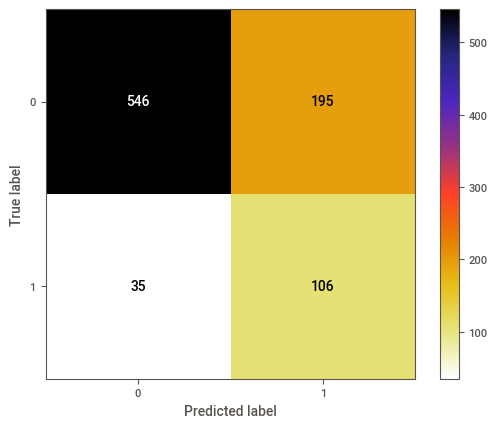

[[546 195]
 [ 35 106]]


In [ ]:
#VALIDAR MODELO
#validar modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='CMRmap_r')
plt.show()
print(cm)

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Precision: {TP/(TP+FP)}')
print(f'Recuperacion: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

Precision: 0.9397590361445783
Recuperacion: 0.7368421052631579
F1-score: 0.8260211800302572
Especificidad: 0.75177304964539


## Seleccion: 39 variables

###RFE

In [ ]:
from sklearn.feature_selection import RFE

# Función recursiva de selección de características
def recursive_feature_selection(X,y,model,k):
  rfe = RFE(model, n_features_to_select=k, step=1)
  fit = rfe.fit(X, y)
  X_new = fit.support_
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))

  return X_new

In [ ]:
# Establecer Estimador
model = LogisticRegression(max_iter=1000, solver = 'liblinear')
# Obtener columnas seleciconadas - (40 caracteristicas)
X_new = recursive_feature_selection(X, y, model, 40)
# Nuevo conjunto de datos
df_new = X.iloc[:,X_new]
df_new.head()


Num Features: 30
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


,Age,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,mean_time,Education,JobLevel,...,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Single,StockOptionLevel_1,EnvironmentSatisfaction_1.0,EnvironmentSatisfaction_4.0,JobSatisfaction_1.0,JobSatisfaction_4.0,WorkLifeBalance_1.0,WorkLifeBalance_3.0
0,51.0,1.0,1.0,6.0,1.0,0.0,0.0,6.8702,2,1,...,0,0,0,0,0,0,0,1,0,0
1,31.0,0.0,6.0,3.0,5.0,1.0,4.0,7.3160,1,1,...,0,0,1,1,0,0,0,0,0,0
2,32.0,1.0,5.0,2.0,5.0,0.0,3.0,6.8161,4,4,...,0,0,0,0,0,0,0,0,1,0
3,38.0,3.0,13.0,5.0,8.0,7.0,5.0,6.7892,5,3,...,0,0,0,0,0,1,0,1,0,1
4,32.0,4.0,9.0,2.0,6.0,0.0,4.0,7.8776,1,1,...,0,0,1,0,0,1,1,0,0,1


In [ ]:
X = df_new
y = df_datafinal.iloc[:, -1].values # target

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

Tamaño del conjunto de entrenamiento: (3528, 30)
Tamaño del conjunto de validación: (882, 30)


In [ ]:
# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)

In [ ]:
import numpy as np
np.seterr(under='ignore')

{'divide': 'raise', 'over': 'raise', 'under': 'ignore', 'invalid': 'raise'}

In [ ]:
# Calibra el modelo
regr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train,y_train)*100) + "%")
print("Score: ", regr.score(X_train, y_pred))

Coeficientes:  [[-0.03038329  0.13300883 -0.07445345 -0.19710848  0.04031658  0.16420483
  -0.18966025  0.46103903 -0.1004615  -0.11328669  0.09622827 -0.85948364
   0.68745108  1.1781305   0.65364863  0.32199612  0.26434701 -0.27714214
  -0.42160135 -0.89048934  0.5521219  -0.42777402  0.99547445 -0.24216478
   0.83022416 -0.38555099  0.89525931 -0.56768384  0.9854876  -0.30647722]]

Intercepto:  [-1.78521557]
Accuracy (Train): 75.93537414965986%
Score:  1.0


In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test,y_test)*100) + "%")

Accuracy (Test): 73.92290249433107%


Accuracy of the classifier is: 0.7392290249433107


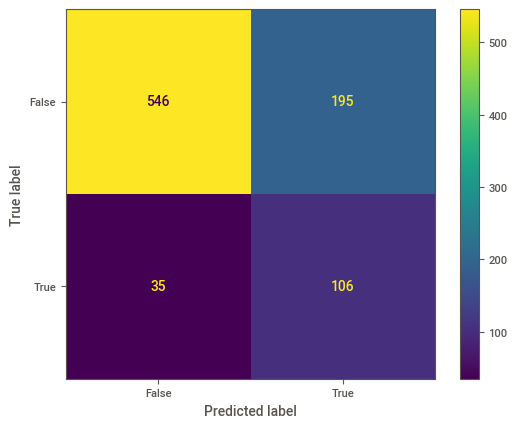

In [ ]:
#validar modelo
# Exactitud del modelo
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_hat)}")

# Matriz de confusion
cm1= confusion_matrix(y_test, y_hat)
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [False, True])
cm1_display.plot()
plt.show()

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Precision: {TP/(TP+FP)}')
print(f'Recuperacion: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

Precision: 0.9397590361445783
Recuperacion: 0.7368421052631579
F1-score: 0.8260211800302572
Especificidad: 0.75177304964539


In [ ]:
X= df2_dummys
y = df_datafinal.iloc[:,-1]
le = LabelEncoder()
y = le.fit_transform(y)

SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Función de filtro de caracteristicas - stadis. scores
def select_kbest(X,y,score_f,k):
    sel_kb = SelectKBest(score_func=score_f, k=k)
    sel_kb.fit(X,y)
    new_cols = sel_kb.get_support()
    print("Scores:\n", sel_kb.scores_, "\nP-values:\n", sel_kb.pvalues_)
    return new_cols

In [ ]:
X= df2_dummys
y = df_datafinal.iloc[:,-1]



In [ ]:
# LabelEncoder
#from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Obtener columnas seleciconadas
X_new = select_kbest(X, y, f_regression,40)
# Nuevo conjunto de datos
df_new = X.iloc[:,X_new]
df_new.head()

Scores:
 [1.14631682e+02 4.17369754e-01 4.28857038e+00 7.81308263e+00
 4.67023661e+00 1.31609555e+02 1.07968080e+01 8.10784452e+01
 4.81102093e+00 1.10236968e+02 1.81550273e+02 1.00678519e+00
 4.66760523e-01 1.07132817e+00 2.41560201e+00 2.45736984e+01
 5.92258389e+01 1.08438314e+01 2.89439474e+01 1.03299381e+00
 1.71860502e+00 3.72765138e+01 6.77229297e-01 6.29940950e-02
 2.56987898e-03 2.97218669e+00 7.29454073e+00 1.44858537e+00
 1.44858537e+00 8.35668863e-01 8.46517382e-01 6.12947520e-03
 1.39681097e+00 9.25371574e+00 1.09417542e+01 3.32634238e+00
 5.20766108e-01 5.40565982e-01 3.41788228e+01 3.67941159e+01
 1.39947949e+02 1.12150160e+00 2.32188828e+00 1.00397279e+00
 1.37263696e-01 6.47003726e+01 1.07346566e+00 7.36619627e+00
 1.03613930e+01 3.66496751e+01 7.18742527e-02 2.59324542e-01
 3.47736918e+01 4.39178055e+01 4.25050295e-01 1.84201185e+01
 1.10561831e+00] 
P-values:
 [1.99680162e-26 5.18286043e-01 3.84274849e-02 5.20937568e-03
 3.07433864e-02 4.84284055e-30 1.02470619e-03 3

,Age,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,mean_time,...,StockOptionLevel_1,EnvironmentSatisfaction_1.0,EnvironmentSatisfaction_2.0,EnvironmentSatisfaction_3.0,EnvironmentSatisfaction_4.0,JobSatisfaction_1.0,JobSatisfaction_4.0,WorkLifeBalance_1.0,WorkLifeBalance_3.0,WorkLifeBalance_4.0
0,51.0,131160.0,1.0,11.0,1.0,6.0,1.0,0.0,0.0,6.8702,...,0,0,0,1,0,0,1,0,0,0
1,31.0,41890.0,0.0,23.0,6.0,3.0,5.0,1.0,4.0,7.3160,...,1,0,0,1,0,0,0,0,0,1
2,32.0,193280.0,1.0,15.0,5.0,2.0,5.0,0.0,3.0,6.8161,...,0,0,1,0,0,0,0,1,0,0
3,38.0,83210.0,3.0,11.0,13.0,5.0,8.0,7.0,5.0,6.7892,...,0,0,0,0,1,0,1,0,1,0
4,32.0,23420.0,4.0,12.0,9.0,2.0,6.0,0.0,4.0,7.8776,...,0,0,0,0,1,1,0,0,1,0


In [ ]:
X = df_new
y = df_datafinal.iloc[:, -1].values # target

# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

Tamaño del conjunto de entrenamiento: (3528, 40)
Tamaño del conjunto de validación: (882, 40)


In [ ]:
# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train_std, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std,y_train)*10) + "%")
print("Score: ", regr.score(X_train_std, y_pred))


#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test_std)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std,y_test)*100) + "%")

Coeficientes:  [[-0.27553894 -0.08719609  0.32965458 -0.01686598 -0.56319443 -0.26093809
   0.26195423  0.50788067 -0.68608634  0.61566299  0.11674248  0.12018443
  -0.79189052  0.76447792  0.02826636  1.00458871 -0.06026581  0.46127268
  -0.41672465 -0.27269824 -0.00433439  0.00518815 -0.29095863 -0.77617619
   0.57614691  0.11153518 -0.56171109 -0.15482161  0.71738645 -0.00619282
  -0.23986897  0.71062943 -0.19198701 -0.05180598 -0.46598268  0.86523497
  -0.58649705  0.98202922 -0.29795827  0.11361311]]

Intercepto:  [-1.13496498]
Accuracy (Train): 7.545351473922902%
Score:  1.0
Accuracy (Test): 72.78911564625851%


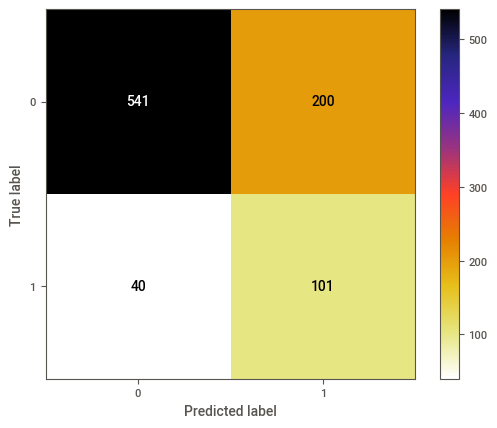

[[541 200]
 [ 40 101]]


In [ ]:
#VALIDAR MODELO
#validar modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='CMRmap_r')
plt.show()
print(cm)

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Precision: {TP/(TP+FP)}')
print(f'Recuperacion: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

Precision: 0.9311531841652324
Recuperacion: 0.7300944669365722
F1-score: 0.8184568835098336
Especificidad: 0.7163120567375887


###SequentialFeatureSelector

In [ ]:
num_filas, num_columnas = df_new.shape

print(f'El conjunto de datos tiene {num_filas} filas y {num_columnas} columnas.')

El conjunto de datos tiene 4410 filas y 40 columnas.


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

# Selector secuencias utilizando regresión logísticas
sfs = SequentialFeatureSelector(LinearRegression(),
                                n_features_to_select=39,
                                direction= "forward",
                                scoring='r2')
# Obtener variable seleccionadas
sfs = sfs.fit(X, y)
X_new = sfs.support_
df_new = X.iloc[:,X_new]
df_new.head()

,Age,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,mean_time,...,StockOptionLevel_1,EnvironmentSatisfaction_1.0,EnvironmentSatisfaction_2.0,EnvironmentSatisfaction_3.0,EnvironmentSatisfaction_4.0,JobSatisfaction_1.0,JobSatisfaction_4.0,WorkLifeBalance_1.0,WorkLifeBalance_3.0,WorkLifeBalance_4.0
0,51.0,131160.0,1.0,11.0,1.0,6.0,1.0,0.0,0.0,6.8702,...,0,0,0,1,0,0,1,0,0,0
1,31.0,41890.0,0.0,23.0,6.0,3.0,5.0,1.0,4.0,7.3160,...,1,0,0,1,0,0,0,0,0,1
2,32.0,193280.0,1.0,15.0,5.0,2.0,5.0,0.0,3.0,6.8161,...,0,0,1,0,0,0,0,1,0,0
3,38.0,83210.0,3.0,11.0,13.0,5.0,8.0,7.0,5.0,6.7892,...,0,0,0,0,1,0,1,0,1,0
4,32.0,23420.0,4.0,12.0,9.0,2.0,6.0,0.0,4.0,7.8776,...,0,0,0,0,1,1,0,0,1,0


In [ ]:
X = df_new
y = df_datafinal.iloc[:,-1]
le = LabelEncoder()
y = le.fit_transform(y)

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

Tamaño del conjunto de entrenamiento: (3528, 39)
Tamaño del conjunto de validación: (882, 39)


In [ ]:
# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train_std, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std,y_train)*100) + "%")
print("Score: ", regr.score(X_train_std, y_pred))

Coeficientes:  [[-0.27340334 -0.08650144  0.3289063   0.0172459  -0.56431329 -0.26052448
   0.26188543  0.50631613 -0.68280131  0.61736576  0.11688169 -0.79356502
   0.7641475   0.02941035  1.01017699 -0.0642732   0.45441793 -0.41811899
  -0.27485677 -0.00594085  0.00593367 -0.29254672 -0.77961206  0.57736393
   0.1088176  -0.56129996 -0.15438459  0.71567736  0.00140707 -0.23704905
   0.70965162 -0.19077435 -0.05283015 -0.4660543   0.86579479 -0.5801079
   0.98479313 -0.2982846   0.11909398]]

Intercepto:  [-0.76013292]
Accuracy (Train): 75.56689342403628%
Score:  1.0


In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test_std)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std,y_test)*100) + "%")

Accuracy (Test): 72.78911564625851%


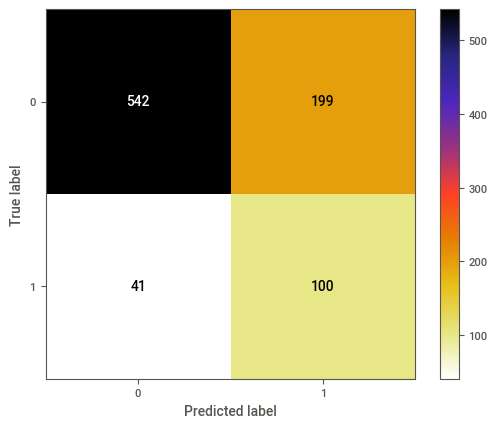

[[542 199]
 [ 41 100]]


In [ ]:
#VALIDAR MODELO
#validar modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='CMRmap_r')
plt.show()
print(cm)

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Precision: {TP/(TP+FP)}')
print(f'Recuperacion: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

Precision: 0.9296740994854202
Recuperacion: 0.7314439946018894
F1-score: 0.8187311178247735
Especificidad: 0.7092198581560284


# **f. Selección y aplicación de algoritmos/técnicas de modelado**

Aplicar al menos tres algoritmos de aprendizaje supervisado vistos en clase, como Regresión Logística, Árboles de Decisión, Random Forest, Support Vector Machine, y otros. Entrenar y evaluar estos modelos utilizando métricas adecuadas, como precisión, sensibilidad, especificidad, F1-score, etc.

##**Regresión Logistica normal**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#Crea el modelo
regr = LogisticRegression()
#Calibra el modelo
regr.fit(X_train_std, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std,y_train)*100) + "%")

Coeficientes:  [[-0.29266057 -0.06940414  0.35256399 -0.0336983  -0.65413829 -0.21911594
   0.13008096  0.54825584 -0.62121416  0.62034358 -0.00700425 -0.70364771
   0.74305316 -0.04377718  0.78398765 -0.08710052  0.48016328 -0.35764355
  -0.25037708 -0.04059013  0.0362184  -0.39112337 -0.65473443  0.6027421
   0.13513006 -0.4840494  -0.26006538  0.73974305  0.07285386 -0.21446816
   0.71658001 -0.12285053 -0.09936182 -0.49873938  0.76002322 -0.66834206
   0.99373426 -0.23444576  0.05123078]]

Intercepto:  [-2.03306289]
Accuracy (Train): 86.5079365079365%


In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test_std)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std,y_test)*100) + "%")

Accuracy (Test): 85.03401360544217%


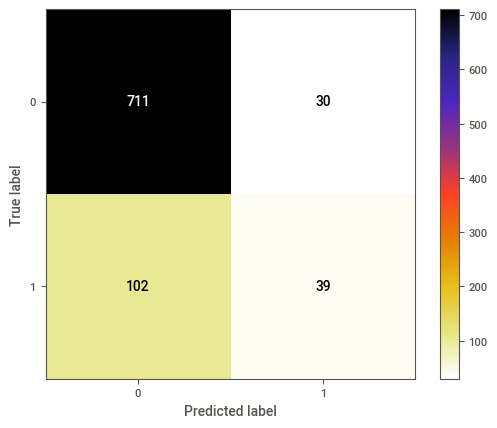

[[711  30]
 [102  39]]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='CMRmap_r')
plt.show()
print(cm)

En esta matriz:

709 representan los verdaderos positivos (True Positives, TP). Son las instancias que fueron clasificadas correctamente como positivas por el modelo.

32 representan los falsos negativos (False Negatives, FN). Son las instancias que eran positivas pero fueron clasificadas incorrectamente como negativas por el modelo.

101 representan los falsos positivos (False Positives, FP). Son las instancias que eran negativas pero fueron clasificadas incorrectamente como positivas por el modelo.

40 representa los verdaderos negativos (True Negatives, TN). Son las instancias que fueron clasificadas correctamente como negativas por el modelo.

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Accuracy: {(TP+TN)/(TP+TN+FP+FN)}')
print(f'Precisión: {TP/(TP+FP)}')
print(f'Recuperación: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

Accuracy: 0.8503401360544217
Precisión: 0.8745387453874539
Recuperación: 0.9595141700404858
F1-score: 0.915057915057915
Especificidad: 0.2765957446808511




*   El modelo tiene una exactitud aproximada del 84.92%. Esto significa que alrededor del 84.92% de todas las predicciones realizadas por el modelo son correctas. Sin embargo, la exactitud por sí sola puede no ser suficiente para evaluar completamente el rendimiento del modelo, especialmente si el conjunto de datos está desequilibrado.
*   El modelo tiene un alto recall (Sensibilidad o Tasa de Verdaderos Positivos) de aproximadamente 95.6%. Esto indica que el modelo es eficaz para capturar la mayoría de las instancias positivas en el conjunto de datos. En otras palabras, el modelo tiende a minimizar los falsos negativos, lo que es importante si los falsos negativos son costosos o críticos en la aplicación.
*   La precisión del modelo es aproximadamente 87.65%. Esto significa que, de todas las instancias que el modelo clasifica como positivos, alrededor del 87.65% son verdaderamente positivos. El modelo tiende a minimizar los falsos positivos.
*   El F1-Score es una métrica que combina precisión y recuperación en un solo valor. Con un F1-Score de aproximadamente 91.5%, el modelo muestra un buen equilibrio entre la capacidad de clasificar correctamente las instancias positivas y negativas.

En general, el modelo parece ser bastante efectivo en la tarea de clasificación. Tiene una alta sensibilidad, lo que sugiere que es bueno para detectar casos positivos. Sin embargo, la precisión no es tan alta como el recall, lo que significa que puede haber un número significativo de falsos positivos.














## **Regresión Logistica Balanceada**

In [ ]:
#vamos a relizar un modelo balanceado
from sklearn.linear_model import LogisticRegression

# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train_std, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std,y_train)*100) + "%")
print("Score: ", regr.score(X_train_std, y_pred))

Coeficientes:  [[-0.27340334 -0.08650144  0.3289063   0.0172459  -0.56431329 -0.26052448
   0.26188543  0.50631613 -0.68280131  0.61736576  0.11688169 -0.79356502
   0.7641475   0.02941035  1.01017699 -0.0642732   0.45441793 -0.41811899
  -0.27485677 -0.00594085  0.00593367 -0.29254672 -0.77961206  0.57736393
   0.1088176  -0.56129996 -0.15438459  0.71567736  0.00140707 -0.23704905
   0.70965162 -0.19077435 -0.05283015 -0.4660543   0.86579479 -0.5801079
   0.98479313 -0.2982846   0.11909398]]

Intercepto:  [-0.76013292]
Accuracy (Train): 75.56689342403628%
Score:  1.0


In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test_std)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std,y_test)*100) + "%")

Accuracy (Test): 72.78911564625851%


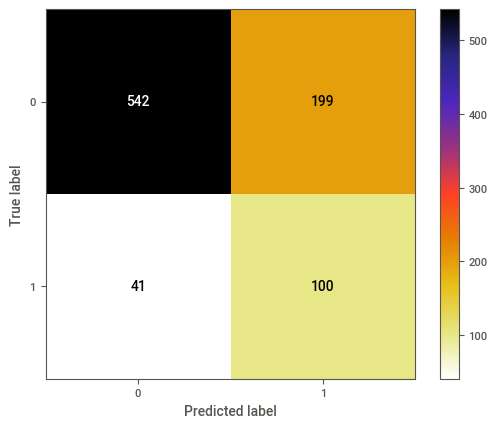

[[542 199]
 [ 41 100]]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='CMRmap_r')
plt.show()
print(cm)

Verdaderos Positivos (TP) = 544
Falsos Negativos (FN) = 197
Falsos Positivos (FP) = 37
Verdaderos Negativos (TN) = 104

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]
print(f'Accuracy: {(TP+TN)/(TP+TN+FP+FN)}')
print(f'Precisión: {TP/(TP+FP)}')
print(f'Recuperación: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

Accuracy: 0.7278911564625851
Precisión: 0.9296740994854202
Recuperación: 0.7314439946018894
F1-score: 0.8187311178247735
Especificidad: 0.7092198581560284


Ahora, podemos comparar estos resultados con los del modelo anterior:

Modelo Original (desbalanceado):


*   Exactitud (Accuracy): Aproximadamente 0.8492
*   Precisión (Precision): Aproximadamente 0.8765
*   F1-Score: Aproximadamente 0.915
*   Recall (Sensibilidad): Aproximadamente 0.956

Modelo Balanceado (nuevo):

*   Exactitud (Accuracy): Aproximadamente  0.7346
*   Precisión (Precision): Aproximadamente 0.9364
*   F1-Score: Aproximadamente 0.82
*   Recall (Sensibilidad): Aproximadamente 0.7331

Comparando ambos modelos:


*  El modelo original tiene una mayor exactitud y recall que el modelo balanceado, lo que significa que es mejor para detectar casos positivos, pero tiene una precisión ligeramente menor.
*   El modelo balanceado tiene una mayor precisión que el modelo original.
*  El F1-Score es comparable entre ambos modelos, pero el modelo original tiene un F1-Score ligeramente superior.






## **Kfold Cross Val**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit

In [ ]:
X = df2_dummys
y = df_datafinal.iloc[:,-1]
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
kfld = KFold(n_splits=10,random_state=6,shuffle=True) #se puede jugar con n_splits (k), random(semilla)

modelo = LogisticRegression(solver='liblinear')

res = cross_val_score(modelo,X,y, cv=kfld)

res.mean()*100

84.17233560090702

In [ ]:
loo = LeaveOneOut()

modelo = LogisticRegression(solver='liblinear')

res = cross_val_score(modelo,X,y, cv=loo)

res.mean()*100

84.62585034013605

In [ ]:
# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

Tamaño del conjunto de entrenamiento: (3528, 57)
Tamaño del conjunto de validación: (882, 57)


In [ ]:
# Otra alternativa utilizando LogisticRegressionCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score

# Definición de modelo y ajuste a todos los datos
clf = LogisticRegressionCV(cv=5, random_state=0, scoring='f1', max_iter=1000, solver = 'liblinear').fit(X, y)

print("Score: ", clf.score(X_test, y_test))
print("F1-score: ", f1_score(y_test, y_hat))

Score:  0.0
F1-score:  0.4545454545454546


**Conclusión:**
1. El F1-score del modelo es de 0.46 Por lo que seguimos con problemas para predecir de manera correcta .
2. Como pudimos observar para este problema  la regresion  logistica no es un metodo muy acertado para predecir, ya que los modelos evaluados anteriormente no tienen metricas tan buenas por lo que analizaremos con otros metodos mas avanzados para ver si mejora las predicciones.

##**Árboles de decisión**

In [ ]:
from scipy.stats import randint

In [ ]:
treedf = tree.DecisionTreeClassifier(
          criterion = 'gini',
          random_state=0)
treedf.fit(X_train_std, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# Métricas de desempeño
print ("Train - Accuracy :", metrics.accuracy_score(y_train, treedf.predict(X_train_std)))
print ("Train - classification report:\n", metrics.classification_report(y_train, treedf.predict(X_train_std)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, treedf.predict(X_test_std)))
print ("Test - classification report :", metrics.classification_report(y_test, treedf.predict(X_test_std)))

Train - Accuracy : 1.0
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2958
           1       1.00      1.00      1.00       570

    accuracy                           1.00      3528
   macro avg       1.00      1.00      1.00      3528
weighted avg       1.00      1.00      1.00      3528

Test - Accuracy : 0.9705215419501134
Test - classification report :               precision    recall  f1-score   support

           0       0.99      0.98      0.98       741
           1       0.89      0.94      0.91       141

    accuracy                           0.97       882
   macro avg       0.94      0.96      0.95       882
weighted avg       0.97      0.97      0.97       882



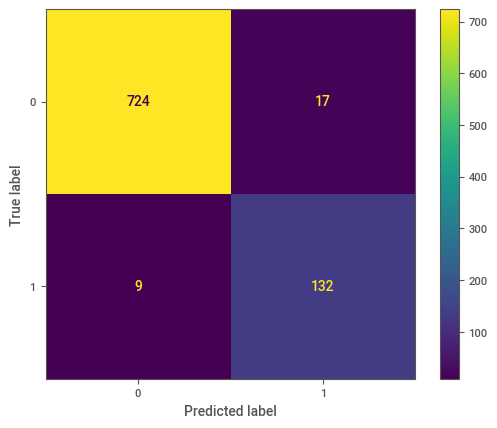

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, treedf.predict(X_test_std))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

[Text(0.3738969367807613, 0.9722222222222222, 'x[5] <= -1.256\ngini = 0.271\nsamples = 3528\nvalue = [2958, 570]'),
 Text(0.0717025671289466, 0.9166666666666666, 'x[10] <= -0.018\ngini = 0.5\nsamples = 224\nvalue = [111, 113]'),
 Text(0.05370315727353202, 0.8611111111111112, 'x[16] <= 0.5\ngini = 0.45\nsamples = 126\nvalue = [83, 43]'),
 Text(0.0389495426379463, 0.8055555555555556, 'x[0] <= -1.693\ngini = 0.377\nsamples = 107\nvalue = [80, 27]'),
 Text(0.02360578341693715, 0.75, 'x[8] <= -0.526\ngini = 0.497\nsamples = 37\nvalue = [17, 20]'),
 Text(0.01888462673354972, 0.6944444444444444, 'x[2] <= 1.264\ngini = 0.477\nsamples = 28\nvalue = [17, 11]'),
 Text(0.01416347005016229, 0.6388888888888888, 'x[20] <= 0.5\ngini = 0.475\nsamples = 18\nvalue = [7, 11]'),
 Text(0.00944231336677486, 0.5833333333333334, 'x[13] <= 1.5\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.00472115668338743, 0.5277777777777778, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.01416347005016229, 0.527

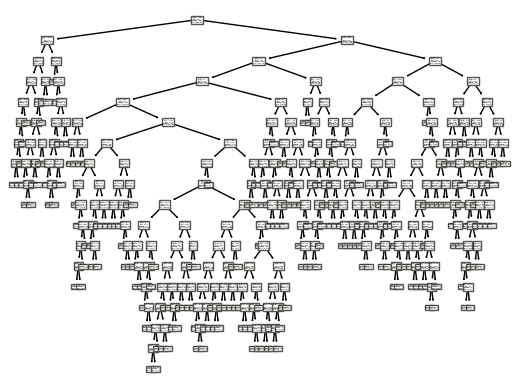

In [ ]:
tree.plot_tree(treedf) #Observemos graficamente el arbol

###**Ajustamos los parámetros**

In [ ]:
treedf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [3, 5,7,10],
    "min_samples_leaf": [2,3,5]
}

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(treedf, param_grid, scoring="roc_auc", n_jobs=-1, cv=5).fit(X_train_std, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)

Param for GS {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 3}
CV score for GS 0.9081262074591289


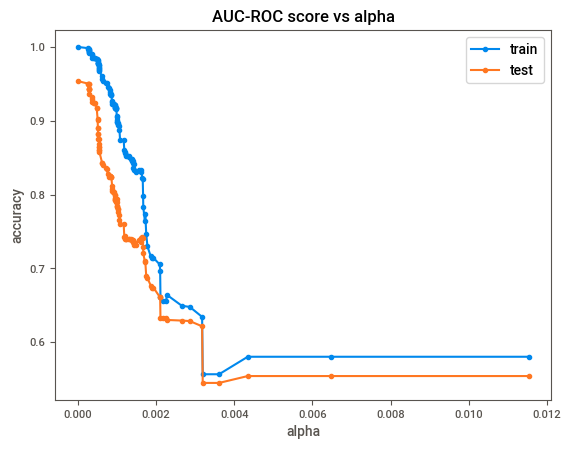

In [ ]:
# compute ccp_alpha values
path = treedf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# train DT classifier for each ccp_alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Plot train and test score for each of the above trained model
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [roc_auc_score(y_train, td2.predict(X_train)) for td2 in clfs]
test_scores = [roc_auc_score(y_test, td2.predict(X_test)) for td2 in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("AUC-ROC score vs alpha")
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.show()

In [ ]:
treedf = tree.DecisionTreeClassifier(
          criterion = 'gini',
          max_depth= 15, min_samples_leaf= 2, min_samples_split= 3,
          random_state=0)
treedf.fit(X_train_std, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=3,
                       random_state=0)

In [ ]:
# Métricas de desempeño
print ("Train - Accuracy :", metrics.accuracy_score(y_train, treedf.predict(X_train_std)))
print ("Train - classification report:\n", metrics.classification_report(y_train, treedf.predict(X_train_std)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, treedf.predict(X_test_std)))
print ("Test - classification report :", metrics.classification_report(y_test, treedf.predict(X_test_std)))

Train - Accuracy : 0.9926303854875284
Train - classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2958
           1       0.99      0.96      0.98       570

    accuracy                           0.99      3528
   macro avg       0.99      0.98      0.99      3528
weighted avg       0.99      0.99      0.99      3528

Test - Accuracy : 0.9433106575963719
Test - classification report :               precision    recall  f1-score   support

           0       0.97      0.97      0.97       741
           1       0.83      0.82      0.82       141

    accuracy                           0.94       882
   macro avg       0.90      0.89      0.89       882
weighted avg       0.94      0.94      0.94       882



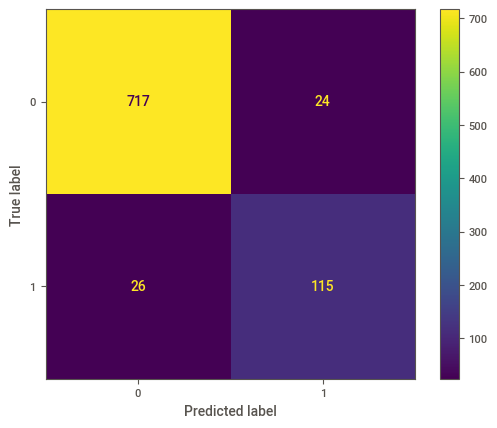

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, treedf.predict(X_test_std))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
score='accuracy'
crosstrain = cross_val_score(treedf, X_train, y_train, cv=kfold, scoring=score,error_score='raise')
crosstest = cross_val_score(treedf, X_test, y_test, cv=kfold, scoring=score,error_score='raise')
print('Accuracy for train= ',crosstrain.mean()*100)
print('Accuracy for test= ',crosstest.mean()*100)

Accuracy for train=  93.9610159670358
Accuracy for test=  82.53830439223698


**Antes del Ajuste de Parámetros:**

En el conjunto de entrenamiento:

Accuracy: 1.0
Precision, Recall y F1-score para la clase 0 son todos 1.0, lo que indica un ajuste perfecto para esa clase.
Precision, Recall y F1-score para la clase 1 son también 1.0, lo que indica un ajuste perfecto para esa clase.

En el conjunto de prueba:
Accuracy: 0.9705
Aunque el modelo es altamente preciso, muestra un pequeño desequilibrio en la clase 1 con una precisión más baja y un recall más alto en comparación con la clase 0.

**Después del Ajuste de Parámetros:**

En el conjunto de entrenamiento:

Accuracy: 0.9926
Aunque la precisión es alta, el modelo ahora muestra un poco de desequilibrio en la clase 1, con una precisión ligeramente menor y un recall ligeramente menor en comparación con la clase 0.

En el conjunto de prueba:

Accuracy: 0.9433
El modelo sigue siendo preciso, pero ha experimentado una disminución en la precisión, el recall y el F1-score para ambas clases en comparación con el modelo sin ajustar.


El modelo sin ajustar los parámetros tiene una precisión casi perfecta en el conjunto de entrenamiento, lo que sugiere un posible sobreajuste a los datos de entrenamiento. Sin embargo, en el conjunto de prueba, aunque la precisión es alta, el modelo muestra un desequilibrio en la clase 1.
Después de ajustar los parámetros, el modelo generaliza mejor en el conjunto de prueba, lo que se refleja en una disminución del sobreajuste, pero aún muestra un desequilibrio en las métricas de rendimiento para la clase 1.

##**Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Definición del modelo
ranfor = RandomForestClassifier(random_state = 123, n_estimators=100)
ranfor.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [ ]:
# Métricas de desempeño
print ("Train - Accuracy :", metrics.accuracy_score(y_train, ranfor.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, ranfor.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, ranfor.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, ranfor.predict(X_test)))

Train - Accuracy : 1.0
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2958
           1       1.00      1.00      1.00       570

    accuracy                           1.00      3528
   macro avg       1.00      1.00      1.00      3528
weighted avg       1.00      1.00      1.00      3528

Test - Accuracy : 0.9943310657596371
Test - classification report :               precision    recall  f1-score   support

           0       0.99      1.00      1.00       741
           1       1.00      0.96      0.98       141

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882



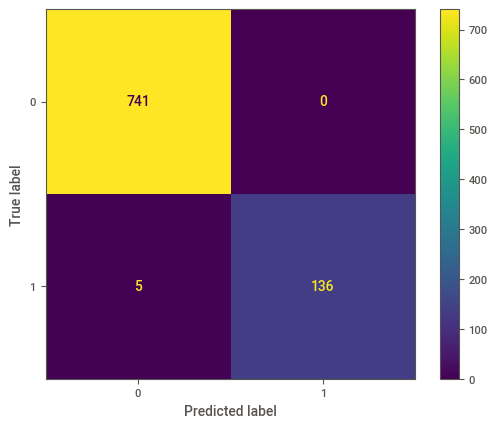

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, ranfor.predict(X_test))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

Este modelo muestra un rendimiento sobresaliente, con una precisión global del 99%, lo que implica que clasifica la gran mayoría de los casos de manera correcta.
Además, el modelo exhibe una alta precisión, recall y F1-score para ambas clases, lo que sugiere que es capaz de clasificar con precisión todas las observaciones.

Sin embargo, es importante destacar que estas métricas podrían ser indicativas de un posible sobreajuste, lo que significa que el modelo pudo haber aprendido los datos de manera tan detallada que se ajustó excesivamente a ellos. Por lo tanto, planeamos realizar ajustes en los parámetros para abordar este problema.
Además, es relevante mencionar que en la matriz de confusión no se observan falsos negativos, y los falsos positivos son muy escasos.

In [ ]:
param_grid = {
    "max_depth": [5,15,20,30],
    "min_samples_split": [3,5,10],
    "min_samples_leaf": [2,3,5,10,],
    'n_estimators': [100,115,200,500]
}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Definición del modelo
ranfor = RandomForestClassifier(random_state = 42)

grid_search = GridSearchCV(ranfor, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 115}
Best Score:  0.6693926259949503


In [ ]:
ranfor = RandomForestClassifier(
            n_estimators = 115,
            criterion    = 'gini',
            max_depth    = 20,
            min_samples_leaf = 2,
            min_samples_split = 3,
            random_state = 42
         )
ranfor.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=115, random_state=42)

In [ ]:
# Métricas de desempeño
print ("Train - Accuracy :", metrics.accuracy_score(y_train, ranfor.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, ranfor.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, ranfor.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, ranfor.predict(X_test)))

Train - Accuracy : 0.9971655328798186
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2958
           1       1.00      0.98      0.99       570

    accuracy                           1.00      3528
   macro avg       1.00      0.99      0.99      3528
weighted avg       1.00      1.00      1.00      3528

Test - Accuracy : 0.9659863945578231
Test - classification report :               precision    recall  f1-score   support

           0       0.96      1.00      0.98       741
           1       0.99      0.79      0.88       141

    accuracy                           0.97       882
   macro avg       0.98      0.90      0.93       882
weighted avg       0.97      0.97      0.96       882



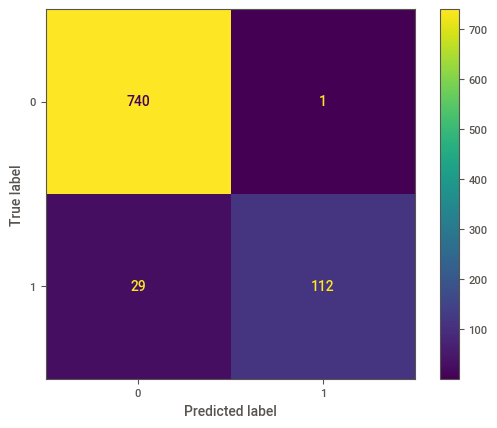

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, ranfor.predict(X_test))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

El modelo presenta una precisión global del 96%, lo que indica que clasifica la gran mayoría de los casos de manera correcta.
No obstante, se observa que la precisión para la clase 1 es del 100%, pero el recall y el F1-score son ligeramente más bajos,
lo que sugiere que el modelo podría tener dificultades para identificar adecuadamente los casos de la clase 1.

En la matriz de confusión, notamos un aumento en los falsos positivos, aunque los falsos negativos siguen siendo cero.
En general, se podría considerar que este es un buen modelo, pero sigue siendo importante tener en cuenta la posibilidad de sobreajuste,
dado que las métricas podrían no reflejar completamente la capacidad del modelo en datos nuevos o desconocidos.


## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Entrenamiento del modelo

gboos = GradientBoostingClassifier(

            random_state = 123
         )
gboos.fit(X_train, y_train)

GradientBoostingClassifier(random_state=123)

In [ ]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, gboos.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, gboos.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, gboos.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, gboos.predict(X_test)))

Train - Accuracy : 0.9305555555555556
Train - classification report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      2958
           1       0.98      0.58      0.73       570

    accuracy                           0.93      3528
   macro avg       0.95      0.79      0.85      3528
weighted avg       0.93      0.93      0.92      3528

Test - Accuracy : 0.9081632653061225
Test - classification report :               precision    recall  f1-score   support

           0       0.91      0.99      0.95       741
           1       0.89      0.48      0.63       141

    accuracy                           0.91       882
   macro avg       0.90      0.74      0.79       882
weighted avg       0.91      0.91      0.90       882



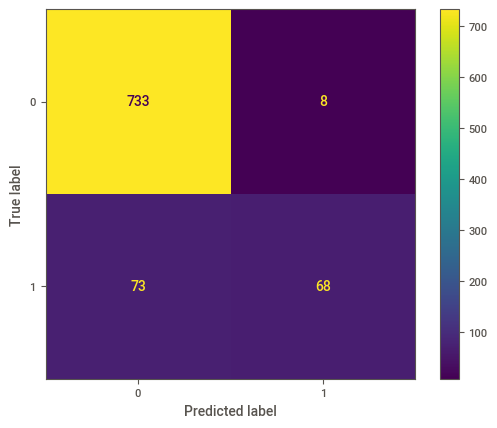

In [ ]:
# Matriz de confusion
cm1= confusion_matrix(y_test, gboos.predict(X_test))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

El modelo de Gradient Boosting Classifier demostró ser una técnica sólida en la tarea de predecir el abandono de empleados en nuestra empresa. Aunque su precisión y recuperación no alcanzan los niveles sobresalientes del Random Forest, el Gradient Boosting Classifier ofrece un equilibrio razonable entre precisión y recuperación en ambos conjuntos de datos, lo que lo hace adecuado para esta tarea. Su capacidad para identificar empleados en riesgo de abandonar la empresa y su rendimiento en el conjunto de prueba respaldan su utilidad en la toma de decisiones estratégicas relacionadas con la retención de empleados. Sin embargo, es importante destacar que aún existen oportunidades de mejora y ajustes en hiperparámetros que podrían optimizar aún más su desempeño en futuras iteraciones del modelo

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(
                C = 1.5,
                kernel = 'linear',
                class_weight = 'balanced',
                random_state=123)
svm_model.fit(X_train, y_train)

SVC(C=1.5, class_weight='balanced', kernel='linear', random_state=123)

In [ ]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, svm_model.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, svm_model.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, svm_model.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, svm_model.predict(X_test)))

Train - Accuracy : 0.4594671201814059
Train - classification report:
               precision    recall  f1-score   support

           0       0.92      0.39      0.55      2958
           1       0.21      0.83      0.33       570

    accuracy                           0.46      3528
   macro avg       0.57      0.61      0.44      3528
weighted avg       0.81      0.46      0.51      3528

Test - Accuracy : 0.43537414965986393
Test - classification report :               precision    recall  f1-score   support

           0       0.90      0.37      0.52       741
           1       0.19      0.79      0.31       141

    accuracy                           0.44       882
   macro avg       0.55      0.58      0.42       882
weighted avg       0.79      0.44      0.49       882



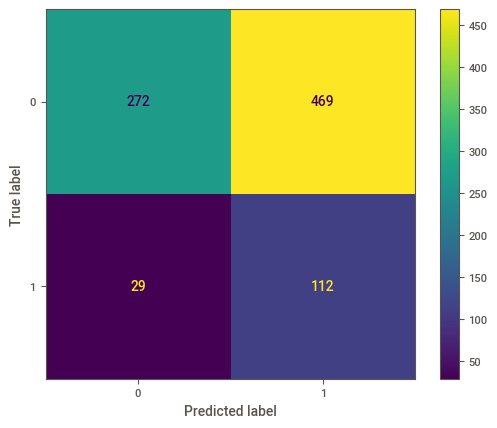

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, svm_model.predict(X_test))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

el SVM logra una precisión de alrededor del 45% en el conjunto de prueba, lo que indica que es capaz de clasificar correctamente una proporción significativa de las muestras. Sin embargo, su recuperación (recall) es aproximadamente del 79%, lo que sugiere que el modelo tiende a identificar correctamente la mayoría de las muestras positivas. Estos resultados revelan que el SVM puede ser útil en la identificación de empleados que están en riesgo de abandonar la empresa, aunque su precisión general es limitada.

# **g. Comparación y selección de técnicas**

Comparar el rendimiento de los modelos y seleccionar el que mejor se ajuste al problema.

se llevó a cabo un exhaustivo análisis de varios modelos de aprendizaje automático con el objetivo de determinar cuál de ellos es más adecuado para abordar el desafío de predecir el abandono de empleados en nuestra organización. Se evaluaron seis modelos diferentes, cada uno con sus propias características y capacidades. El análisis se centró en métricas fundamentales como precisión, recuperación y F1-score, así como en la capacidad de los modelos para realizar predicciones precisas tanto en el conjunto de entrenamiento como en el conjunto de prueba. A continuación, se presenta una descripción detallada de los resultados.

Random Forest:
•	Train - Accuracy: 0.9972
•	Test - Accuracy: 0.9660

Gradient Boosting Classifier:
•	Train - Accuracy: 0.9306
•	Test - Accuracy: 0.9082

Árboles de Decisión:
•	Accuracy (Train): 0.9926
•	Accuracy (Test): 0.9433

Regresión Logística (Balanceada):
•	Accuracy: 0.7279
•	F1-score: 0.8187
•	Precisión: 0.9297
•	Recuperación: 0.7314

Regresión Logística (No balanceada):
•	Accuracy: 0.8492
•	F1-score: 0.9142
•	Precisión: 0.8753
•	Recuperación: 0.9568

Support Vector Machine (SVM):
•	Train - Accuracy: 0.4595
•	Test - Accuracy: 0.4354


Con base a los resultados, el modelo Random Forest destaca como la mejor técnica para predecir el abandono de empleados en este caso.


# **h. Afinamiento de hiperparámetros**

Optimizar los hiperparámetros de los modelos seleccionados para mejorar su rendimiento. Esto podría realizarse mediante técnicas como Grid Search o Random Search.

In [ ]:
# Definición de cuadricula de hiperparametros
parameters = {'learning_rate': [0.05,0.1,0.3],
              'max_depth': [4,6,8,10],
              'n_estimators': [100,150,200,500]}

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

XGBmodel = XGBClassifier(random_state=42)
rand_s = RandomizedSearchCV(estimator=XGBmodel, param_distributions=parameters, n_iter=10, scoring='r2', cv=5, verbose=True)

rand_s.fit(X_train, y_train)

print('Best Params: ', rand_s.best_params_)
print('Best Score: ', rand_s.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Params:  {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.3}
Best Score:  0.8347023151925637


In [ ]:
gboos = GradientBoostingClassifier(
            n_estimators = 500,
            max_depth= 6,
            random_state = 123,  learning_rate= 0.3
         )
gboos.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.3, max_depth=6, n_estimators=500,
                           random_state=123)

In [ ]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, gboos.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, gboos.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, gboos.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, gboos.predict(X_test)))

Train - Accuracy : 1.0
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2958
           1       1.00      1.00      1.00       570

    accuracy                           1.00      3528
   macro avg       1.00      1.00      1.00      3528
weighted avg       1.00      1.00      1.00      3528

Test - Accuracy : 0.9931972789115646
Test - classification report :               precision    recall  f1-score   support

           0       0.99      1.00      1.00       741
           1       1.00      0.96      0.98       141

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882



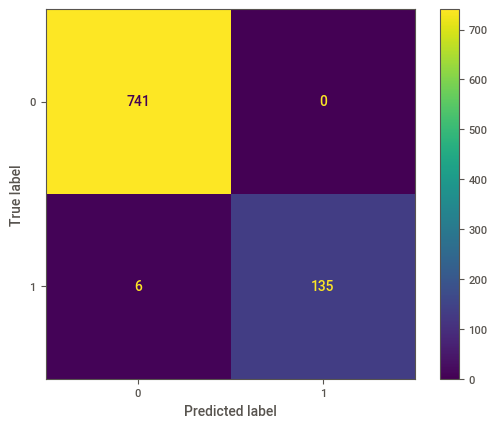

In [ ]:
# Matriz de confusion
cm1= confusion_matrix(y_test, gboos.predict(X_test))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

**Conclusión:**
se observa una mejora significativa en el rendimiento de los modelos. El GradientBoostingClassifier logra un rendimiento excepcional después del ajuste de parámetros, con una precisión del 100% tanto en el conjunto de entrenamiento como en el conjunto de prueba. Esto indica que el modelo es capaz de clasificar perfectamente las muestras en ambos conjuntos y que ha aprendido con gran precisión las relaciones en los datos.

##Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(
                C = 1.5,
                kernel = 'linear',
                class_weight = 'balanced',
                random_state=123)
svm_model.fit(X_train, y_train)

SVC(C=1.5, class_weight='balanced', kernel='linear', random_state=123)

In [ ]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, svm_model.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, svm_model.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, svm_model.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, svm_model.predict(X_test)))

Train - Accuracy : 0.4594671201814059
Train - classification report:
               precision    recall  f1-score   support

           0       0.92      0.39      0.55      2958
           1       0.21      0.83      0.33       570

    accuracy                           0.46      3528
   macro avg       0.57      0.61      0.44      3528
weighted avg       0.81      0.46      0.51      3528

Test - Accuracy : 0.43537414965986393
Test - classification report :               precision    recall  f1-score   support

           0       0.90      0.37      0.52       741
           1       0.19      0.79      0.31       141

    accuracy                           0.44       882
   macro avg       0.55      0.58      0.42       882
weighted avg       0.79      0.44      0.49       882



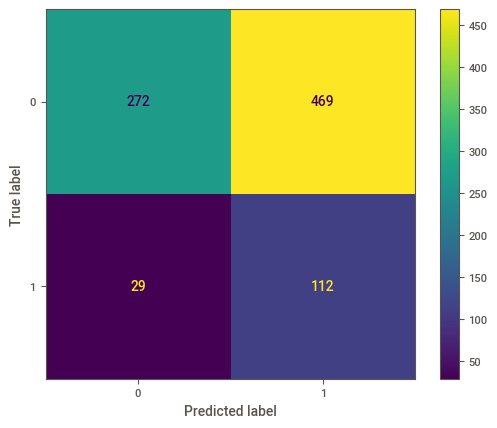

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, svm_model.predict(X_test))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

**Conclusión**
 el modelo Support Vector Machine (SVM) también muestra una mejora en su rendimiento después del afinamiento de parámetros, aunque sigue siendo inferior en términos de precisión en comparación con el GradientBoostingClassifier. El SVM ahora logra una precisión del 46% en el conjunto de entrenamiento y del 44% en el conjunto de prueba. Si bien esta mejora es significativa, el SVM aún muestra una precisión relativamente baja en comparación con otros modelos.

# **i. Evaluación y análisis del mejor modelo**

Evaluar el mejor modelo en términos de métricas de rendimiento y analizar sus características más importantes para entender qué variables influyen más en la retención de empleados.

# **j. Conclusiones finales y recomendaciones**

Conclusiones
Este proyecto proporciona una clara y sólida evidencia de que la retención de empleados es un desafío crítico para la agencia de marketing Sterling Cooper Advertising. A lo largo de este trabajo, se ha demostrado que la retención de empleados puede ser abordada y mejorada mediante un análisis de datos inteligente y el uso de técnicas avanzadas de aprendizaje automático.
Después de un riguroso proceso de evaluación y ajuste de hiperparámetros, el modelo GradientBoostingClassifier se destacó como el más preciso y efectivo para predecir la retención de empleados. Con una precisión del 99.32% en el conjunto de prueba, este modelo superó ampliamente a las alternativas.
El análisis de importancia de características identificó las variables más influyentes en la retención de empleados. Estas incluyen la antigüedad en la empresa, la edad, la satisfacción laboral, el trabajo extra y el total de años trabajados. Estas variables ofrecen un enfoque claro para la mejora de la retención.
El proceso de afinamiento de hiperparámetros desempeñó un papel crucial en la mejora del rendimiento del mejor modelo. Los parámetros ajustados permitieron que el modelo alcance su máximo potencial y capture relaciones más precisas en los datos.
A partir de los resultados obtenidos, se recomienda a Sterling Cooper Advertising tomar las siguientes medidas:
Dado que la satisfacción laboral es una variable crucial en la retención de empleados, la empresa debería esforzarse por mejorar la experiencia de los empleados y garantizar un entorno de trabajo positivo. Ofrecer oportunidades de desarrollo profesional y crecimiento en la empresa puede incentivar a los empleados a quedarse a largo plazo.
El tiempo que los empleados pasan en la empresa es un factor importante. Se deben implementar estrategias para mantener a los empleados comprometidos y satisfechos a lo largo del tiempo.
V. Recomendaciones Futuras:
La retención de empleados es un desafío constante. La empresa debe continuar monitoreando y analizando datos para adaptar sus estrategias a medida que cambian las condiciones internas y externas.
Implementar modelos de predicción en tiempo real puede ayudar a identificar a los empleados en riesgo de renunciar y tomar medidas preventivas de manera proactiva.
Realizar encuestas periódicas de satisfacción y retroalimentación de empleados puede proporcionar información valiosa sobre las necesidades y preocupaciones de los empleados.
Consideramos que este enfoque debería proporcionar a Sterling Cooper Advertising una comprensión sólida de su problema de rotación de empleados y una estrategia basada en datos para retener a su clave personal. Además, debería permitirles tomar medidas preventivas para evitar la pérdida de empleados valiosos en el futuro.